S_W1 (Within-class scatter matrix for X1):
 [[ 0.8  -0.4 ]
 [-0.4   2.64]]
S_W2 (Within-class scatter matrix for X2):
 [[ 1.84 -0.04]
 [-0.04  2.64]]
S_W (Within-class scatter matrix):
 [[ 2.64 -0.44]
 [-0.44  5.28]]

S_B (Between-class scatter matrix):
 [[29.16 21.6 ]
 [21.6  16.  ]]
S_W_inv is :
 [[0.38412292 0.03201024]
 [0.03201024 0.19206146]]
M is :
  [[11.89244558  8.80921895]
 [ 5.08194622  3.76440461]]
Eigenvalues:
 [15.65685019  0.        ]
Eigenvectors:
 [[ 0.91955932 -0.59522755]
 [ 0.39295122  0.80355719]]
Combined matrix is : [[ 1.  -2.6]
 [-1.   0.4]
 [-1.  -0.6]
 [ 0.   2.4]
 [ 1.   0.4]
 [ 0.6  2.4]
 [-2.4  0.4]
 [ 0.6 -2.6]
 [-0.4 -0.6]
 [ 1.6  0.4]]
Final  matrix after dimension reduction is  [-0.10211385 -0.76237883 -1.15533005  0.94308293  1.07673981  1.49481852
 -2.04976187 -0.46993758 -0.60359446  1.6284754 ]


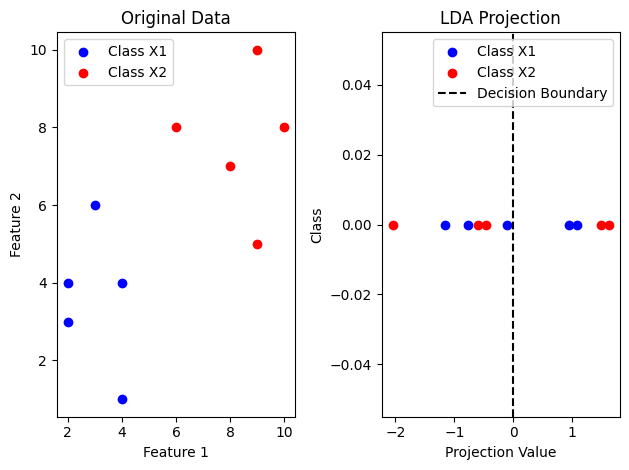

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1 : Define the dataset for X1 and X2
X1 = np.array([[4, 1], [2, 4], [2, 3], [3, 6], [4, 4]])
X2 = np.array([[9, 10], [6, 8], [9, 5], [8, 7], [10, 8]])
mean_X1 = np.array([3, 3.6])
mean_X2 = np.array([8.4, 7.6])




# Step 2 - Calculate S_W1 and S_W2
S_W1 = np.zeros((2, 2))
for x in X1:
    diff = (x - mean_X1).reshape(2, 1)
    S_W1 += diff.dot(diff.T)

S_W1 = S_W1/5
print("S_W1 (Within-class scatter matrix for X1):\n", S_W1)



S_W2 = np.zeros((2, 2))
for x in X2:
    diff = (x - mean_X2).reshape(2, 1)
    S_W2 += diff.dot(diff.T)

S_W2 = S_W2/5
print("S_W2 (Within-class scatter matrix for X2):\n", S_W2)

#Step3 - Calculate S_W
S_W = S_W1 + S_W2



print("S_W (Within-class scatter matrix):\n", S_W)


#Step4 - Calculate between-class scatter matrix S_B


mean_diff = (mean_X1 - mean_X2).reshape(2, 1)
S_B =  mean_diff.dot(mean_diff.T)


print("\nS_B (Between-class scatter matrix):\n", S_B)
#Step5 - Calculate eigen values and eigen vectors for S_W^-1 * S_B

S_W_inv = np.linalg.inv(S_W)
print("S_W_inv is :\n",S_W_inv)

M = S_W_inv.dot(S_B)
print("M is :\n ", M)
eigenvalues, eigenvectors = np.linalg.eig(M)

print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

X1_centered = X1 - mean_X1
X2_centered = X2 - mean_X2

combined_first_col = np.concatenate((X1_centered[:, 0], X2_centered[:, 0]))
combined_second_col = np.concatenate((X1_centered[:, 1], X2_centered[:, 1]))


combined_matrix = np.vstack((combined_first_col, combined_second_col)).T
print("Combined matrix is :", combined_matrix)
first_pc = eigenvectors[:, 0]
final_matrix = np.dot(combined_matrix,first_pc )
print("Final  matrix after dimension reduction is ", final_matrix)
projections_X1 = final_matrix[0:5]
projections_X2 = final_matrix[5:]


plt.subplot(1, 2, 1)
plt.scatter(X1[:, 0], X1[:, 1], color='blue', label='Class X1', marker='o')
plt.scatter(X2[:, 0], X2[:, 1], color='red', label='Class X2', marker='o')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Projected Data Plot
plt.subplot(1, 2, 2)
plt.scatter(projections_X1, np.zeros_like(projections_X1), color='blue', label='Class X1')
plt.scatter(projections_X2, np.zeros_like(projections_X2), color='red', label='Class X2')
plt.axvline(x=0, color='black', linestyle='--', label='Decision Boundary')
plt.title('LDA Projection')
plt.xlabel('Projection Value')
plt.ylabel('Class')
plt.legend()

plt.tight_layout()





